In [730]:
import numpy as np

In [731]:
import matplotlib.pyplot as plt

In [732]:
import pandas as pd

In [733]:
import math

## Linear Regression

In [734]:
numTrainingExamples = 100;
numFeatures = 1;
m = numTrainingExamples;
n = numFeatures;

In [735]:
thetas = np.zeros(n + 1);
thetas.shape

(2,)

In [736]:
x = np.linspace(0, 10, 100);
x = x.reshape(100, 1)
x.shape

(100, 1)

In [737]:
noise = 5*np.random.random((100, 1))

In [738]:
y = 7*x  + noise;

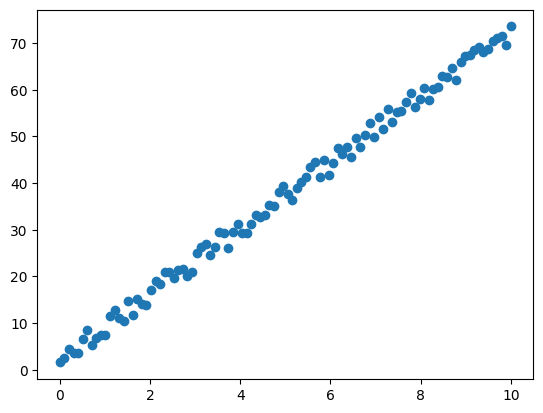

In [739]:
plt.scatter(x, y)

In [740]:
intercepts = np.ones((100, 1))
x = np.hstack((x, intercepts));
x.shape

(100, 2)

In [741]:
numEpochs = 500;

In [742]:
alpha = 0.001;

In [827]:
def hypothesisFun(thetas, example):
    example = example.reshape(example.shape[0])
    thetas_temp = thetas.reshape(example.shape[0])
    print(example);
    y_pred = np.dot(thetas_temp, example).sum();
    return y_pred;

In [823]:
def calcdJ(thetas, x, y):
    DJ = np.zeros((thetas.shape[0], 1))
    for j in range(x.shape[1]):
        sum1 = 0;
        for i in range(x.shape[0]):
            example = x[i];
            # prediction for ith training example
            y_pred = hypothesisFun(thetas, example);
            sum1 += (- y[i] + y_pred)*x[i][j];
        DJ[j, :] = sum1;
    return DJ/x.shape[0];

In [745]:
def lossFun(x, y, thetas):
    loss = 0;
    for i in range(x.shape[0]):
        example = x[i];
        # prediction for ith training example
        y_pred = hypothesisFun(thetas, example);
        loss += (y_pred - y[i])**2;
    return loss/x.shape[0];

In [746]:
# Running Gradient Descent
loss = [];
thetas = np.zeros(n + 1);
thetas = thetas.reshape(n + 1, 1)
for i in range(100):
    DJ = calcdJ(thetas, x, y);
    thetas = thetas - 0.01*DJ;
    loss.append(lossFun(x, y, thetas));


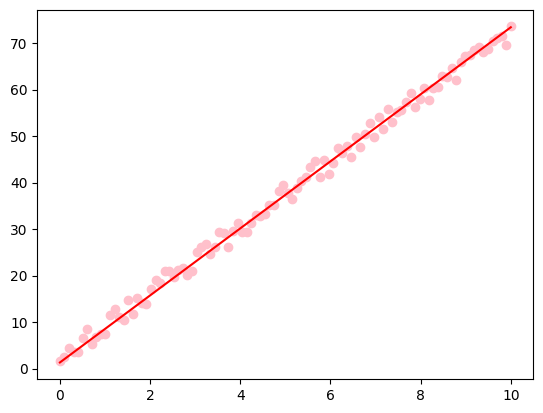

In [747]:
y_pred = [];
for i in range(x.shape[0]):
    example = x[i];
    y_pred.append(hypothesisFun(thetas, example));
plt.plot(x[:, 0], y_pred, color="red")
plt.scatter(x[:, 0], y, color="pink")


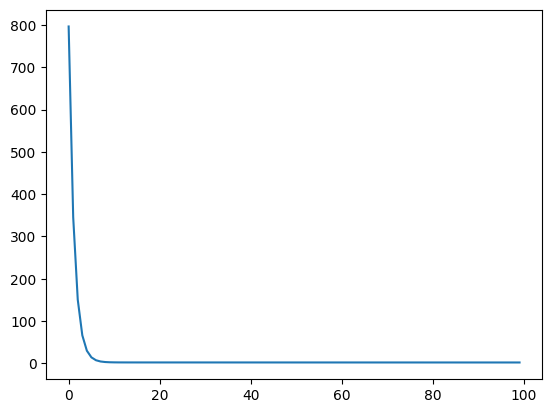

In [748]:
plt.plot(loss)

## Logistic Regression
Only the loss and hypothesis function changes

In [933]:
x1 = np.vstack((3 + 0.1*np.random.randn(50).reshape(50, 1), 4 + 0.1*np.random.randn(50).reshape(50, 1)));
x2 = np.vstack((3 + 0.1*np.random.randn(50).reshape(50, 1), 4 + 0.1*np.random.randn(50).reshape(50, 1)));
x3 = np.ones((100,1))
X = np.hstack((x1, x2, x3))
Y = np.vstack((np.ones((50, 1)).reshape(50, 1), np.zeros((50, 1)).reshape(50, 1)));
print(X.shape, Y.shape)

(100, 3) (100, 1)


In [934]:
z = np.hstack((X, Y))
np.random.shuffle(z)
x = z[:, 0:-1];
y = z[:, -1]

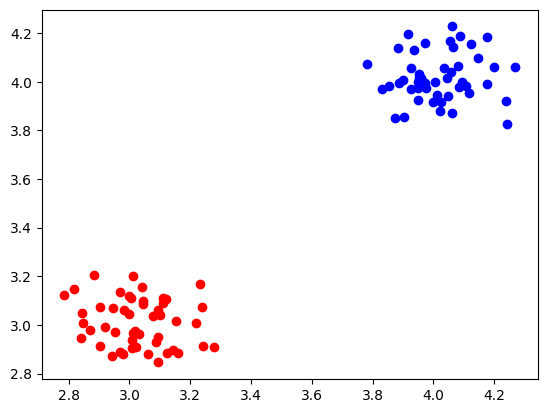

In [935]:
plt.scatter(x1[0:49], x2[0:49], color='red')
plt.scatter(x1[50:], x2[50:], color='blue')

In [936]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

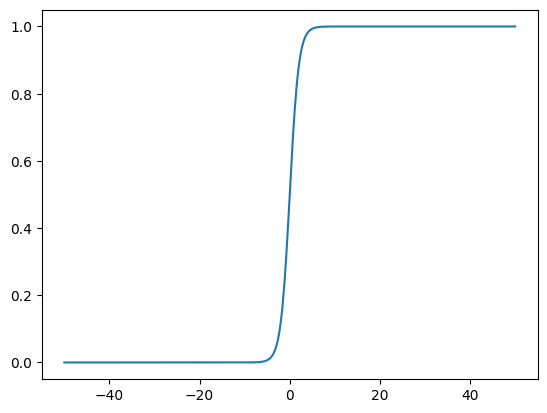

In [937]:
a = np.linspace(-50, 50, 500);
plt.plot(a, sigmoid(a))

In [938]:
def hypoFunLogR(thetas, example):
    y_pred = np.dot(example, thetas);
    return y_pred[0];

In [939]:
def hypoLogR(thetas, example):
    return sigmoid(hypoFunLogR(thetas, example));

In [965]:
def lossFunLogR(x, y, thetas):
    loss = 0;
    # Traversing over all training examples to calculate total loss
    for i in range(x.shape[0]):
        
        # Selecting ith training example
        example = x[i];
        
        # prediction for ith training example
        y_pred = hypoLogR(thetas, example);
        
        # Adding loss for 1 training example to the total loss
        loss += (y[i]*np.log(y_pred) + (1 - y[i])*np.log(1 - y_pred));
        
    return -loss/x.shape[0];

In [966]:
def calcdJLogReg(thetas, x, y):
    DJ = np.zeros((thetas.shape[0], 1))
    for j in range(x.shape[1]):
        sum1 = 0;
        for i in range(x.shape[0]):
            example = x[i];
            # prediction for ith training example
            y_pred = hypoLogR(thetas, example);
            sum1 += (- y[i] + y_pred)*x[i][j];
        DJ[j, :] = sum1;
    return DJ/x.shape[0];

In [978]:
# Running Gradient Descent
loss = [];
thetas = np.zeros(x.shape[1]).reshape(x.shape[1], 1);
for i in range(2000):
    DJ = calcdJLogReg(thetas, x, y);
    thetas = thetas - 0.1*DJ;
    loss.append(lossFunLogR(x, y, thetas));

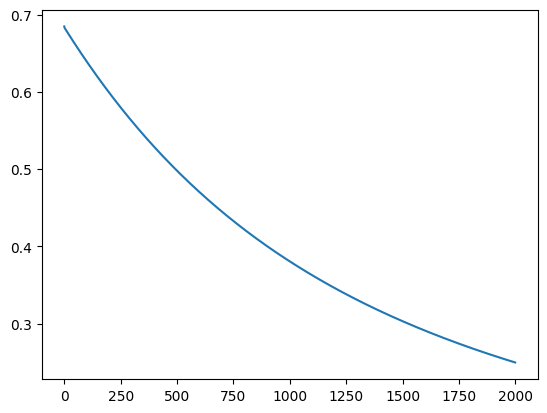

In [979]:
plt.plot(loss)

In [980]:
x_axis = np.linspace(2.5, 4.5, 50)
thetas = thetas/thetas[0]
y_axis = -(thetas[1]*x_axis + thetas[2])

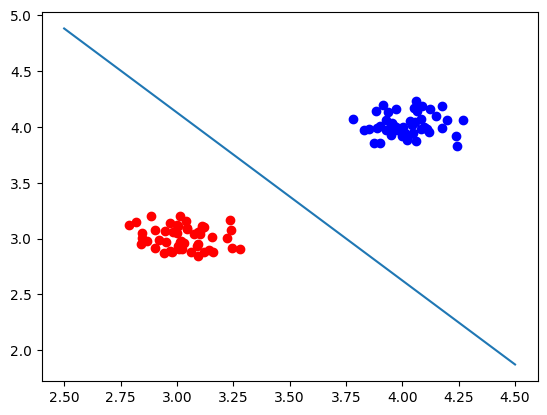

In [981]:
plt.plot(x_axis, y_axis)
plt.scatter(x1[0:49], x2[0:49], color='red')
plt.scatter(x1[50:], x2[50:], color='blue')
# Visually, 